In [66]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
from scipy.integrate import solve_ivp
import pickle
from pathlib import Path
from tqdm import tqdm
plt.style.use('dark_background')

from kcm.dynamical_systems import create_one_dimensional_dataset, plot_phase_diagrams, plot_1d_trajectories
from kcm.dynamical_systems import (
    harmonic_oscillator, harmonic_params,
    sm_damper_forcing, spring_mass_forcing_params,
    duffing_oscillator, duffing_params,
    van_der_pol, vdp_params,
    nonlinear_damped_oscillator, nonlinear_damped_params,
    nonlinear_spring, nonlinear_spring_params,
    piecewise_linear_oscillator, piecewise_linear_params,
    sine_pendulum, sine_pendulum_params,
    sigmoid_pendulum, sigmoid_pendulum_params,
    arctangent_oscillator, arctangent_oscillator_params
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
header = {
    "seed": 42,
    "scipy_version": scipy.__version__,
    "numpy_version": np.__version__,
}
header

{'seed': 42, 'scipy_version': '1.15.3', 'numpy_version': '2.2.6'}

Things to consider:
- Each equation has several parameters that can be adjusted to create different behavior
- The initial condition governs some of the differences between different systems

## Dynamical Systems

In [68]:
systems = {
    'harmonic_oscillator' : (harmonic_oscillator, harmonic_params),
    'spring_mass_with_forcing' : (sm_damper_forcing, spring_mass_forcing_params),
    'duffing_oscillator' : (duffing_oscillator, duffing_params),
    'van_der_pol_oscillator' : (van_der_pol, vdp_params),
    'nonlinear_damped_oscillator' : (nonlinear_damped_oscillator, nonlinear_damped_params),
    'nonlinear_spring' : (nonlinear_spring, nonlinear_spring_params),
    'piecewise_linear_oscillator' : (piecewise_linear_oscillator, piecewise_linear_params),
    'sine_pendulum' : (sine_pendulum, sine_pendulum_params),
    'sigmoid_pendulum' : (sigmoid_pendulum, sigmoid_pendulum_params),
    'arctangent_oscillator' : (arctangent_oscillator, arctangent_oscillator_params),
    # 'time_varying_harmonic' : (time_varying_harmonic, time_varying_harmonic_params)
}

In [72]:
n = 5000
begin = 0
end = 200
num_series = 500
noise_multiplier = 0.01 # 0, 0.01, 0.05
seed = header['seed']

dataset = create_one_dimensional_dataset(n,systems,begin,end,num_series,noise_multiplier,seed=seed)

arctangent_oscillator: 100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [06:56<00:00,  1.20it/s]


In [73]:
save_dataset = True

if save_dataset:
    print('Saving dataset...')
    sample_name = f'noisy_{noise_multiplier}_samples' if noise_multiplier > 0 else 'samples'
    path = Path().resolve().parents[0] / 'data' / '2-dimensional-systems' / f"dataset_{len(systems)}_class_{num_series}_{sample_name}.pkl"
    
    with open(path, 'wb') as f:
        pickle.dump(dataset, f)

else:
    print('Not saving dataset')

Saving dataset...


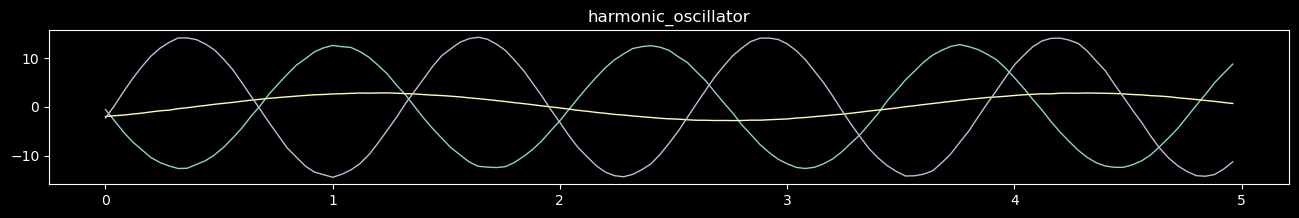

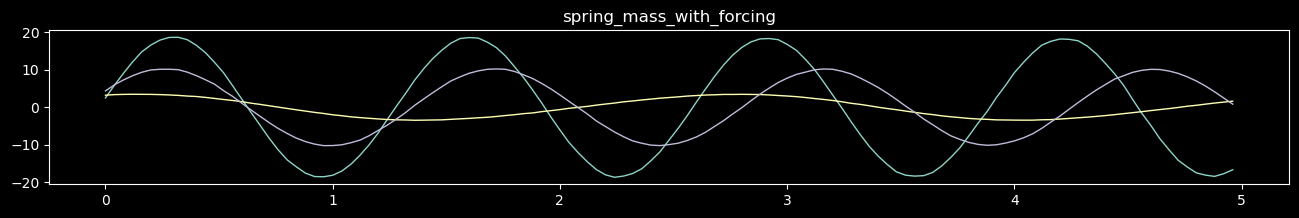

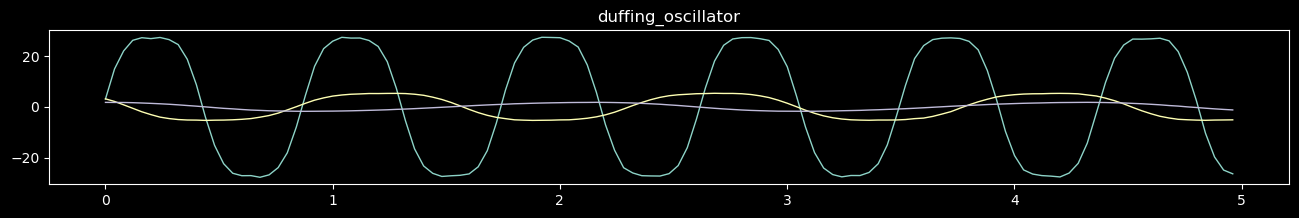

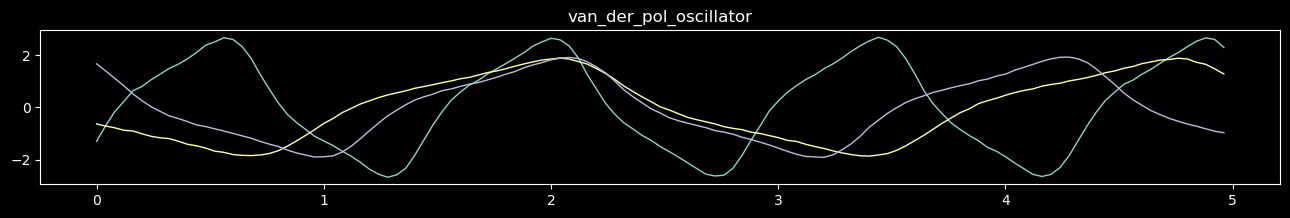

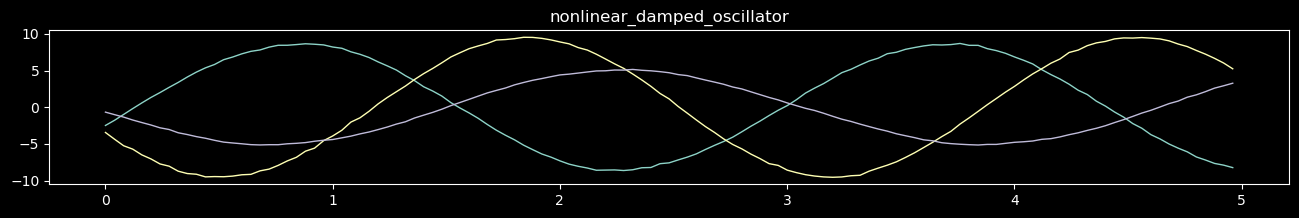

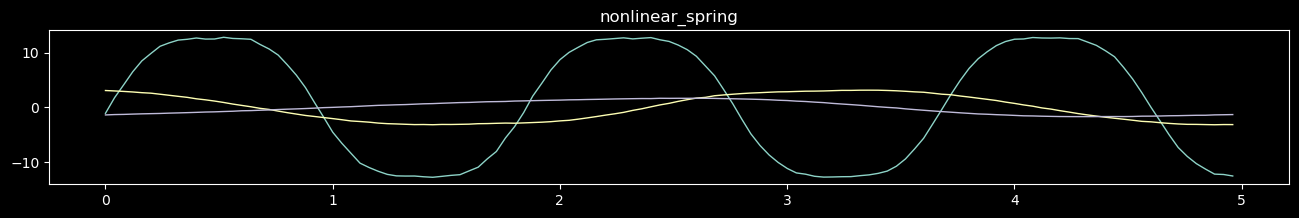

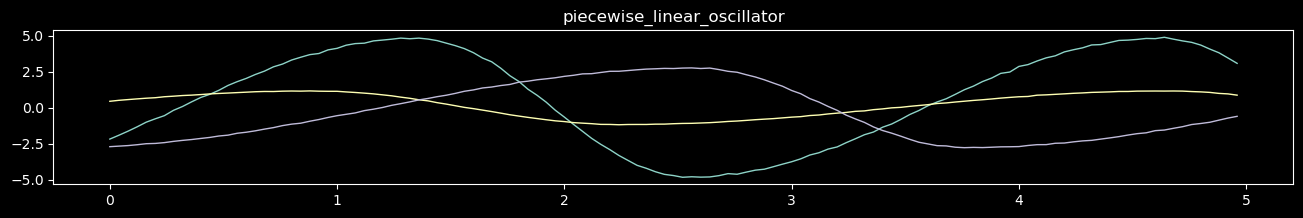

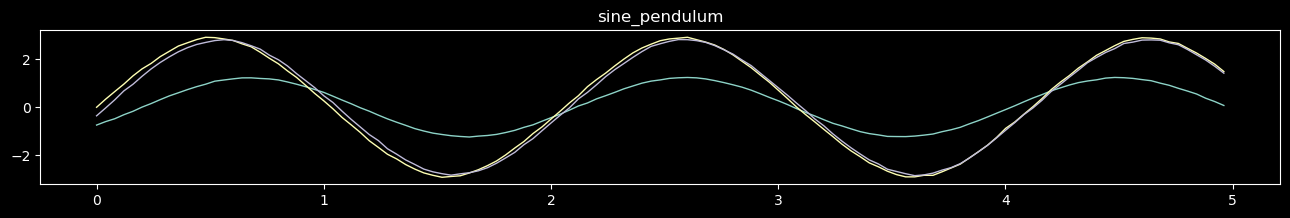

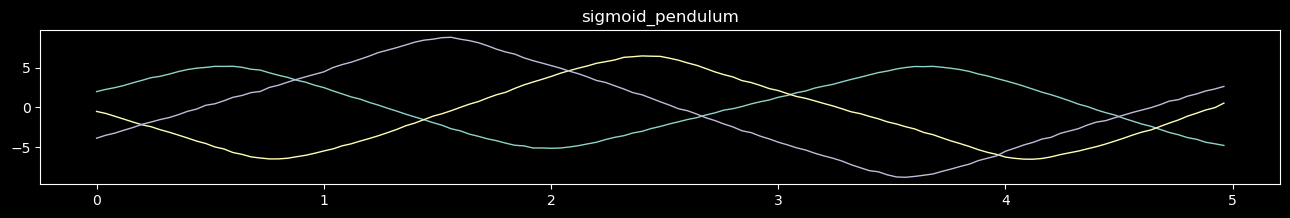

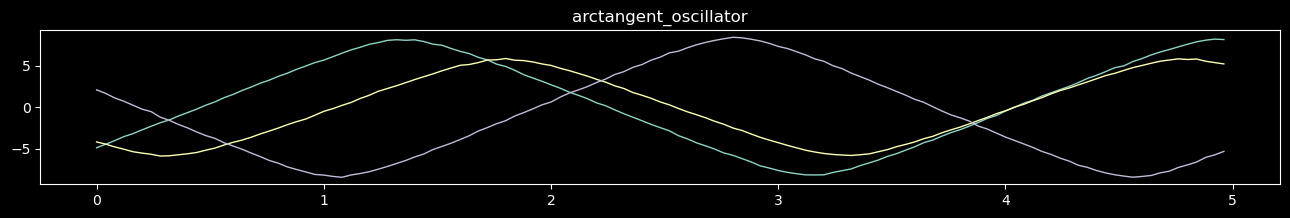

In [71]:
n_examples = 3
dim = 1
frac = 1/40
pos=0
plot_1d_trajectories(dataset, n_examples, dim, frac, pos)

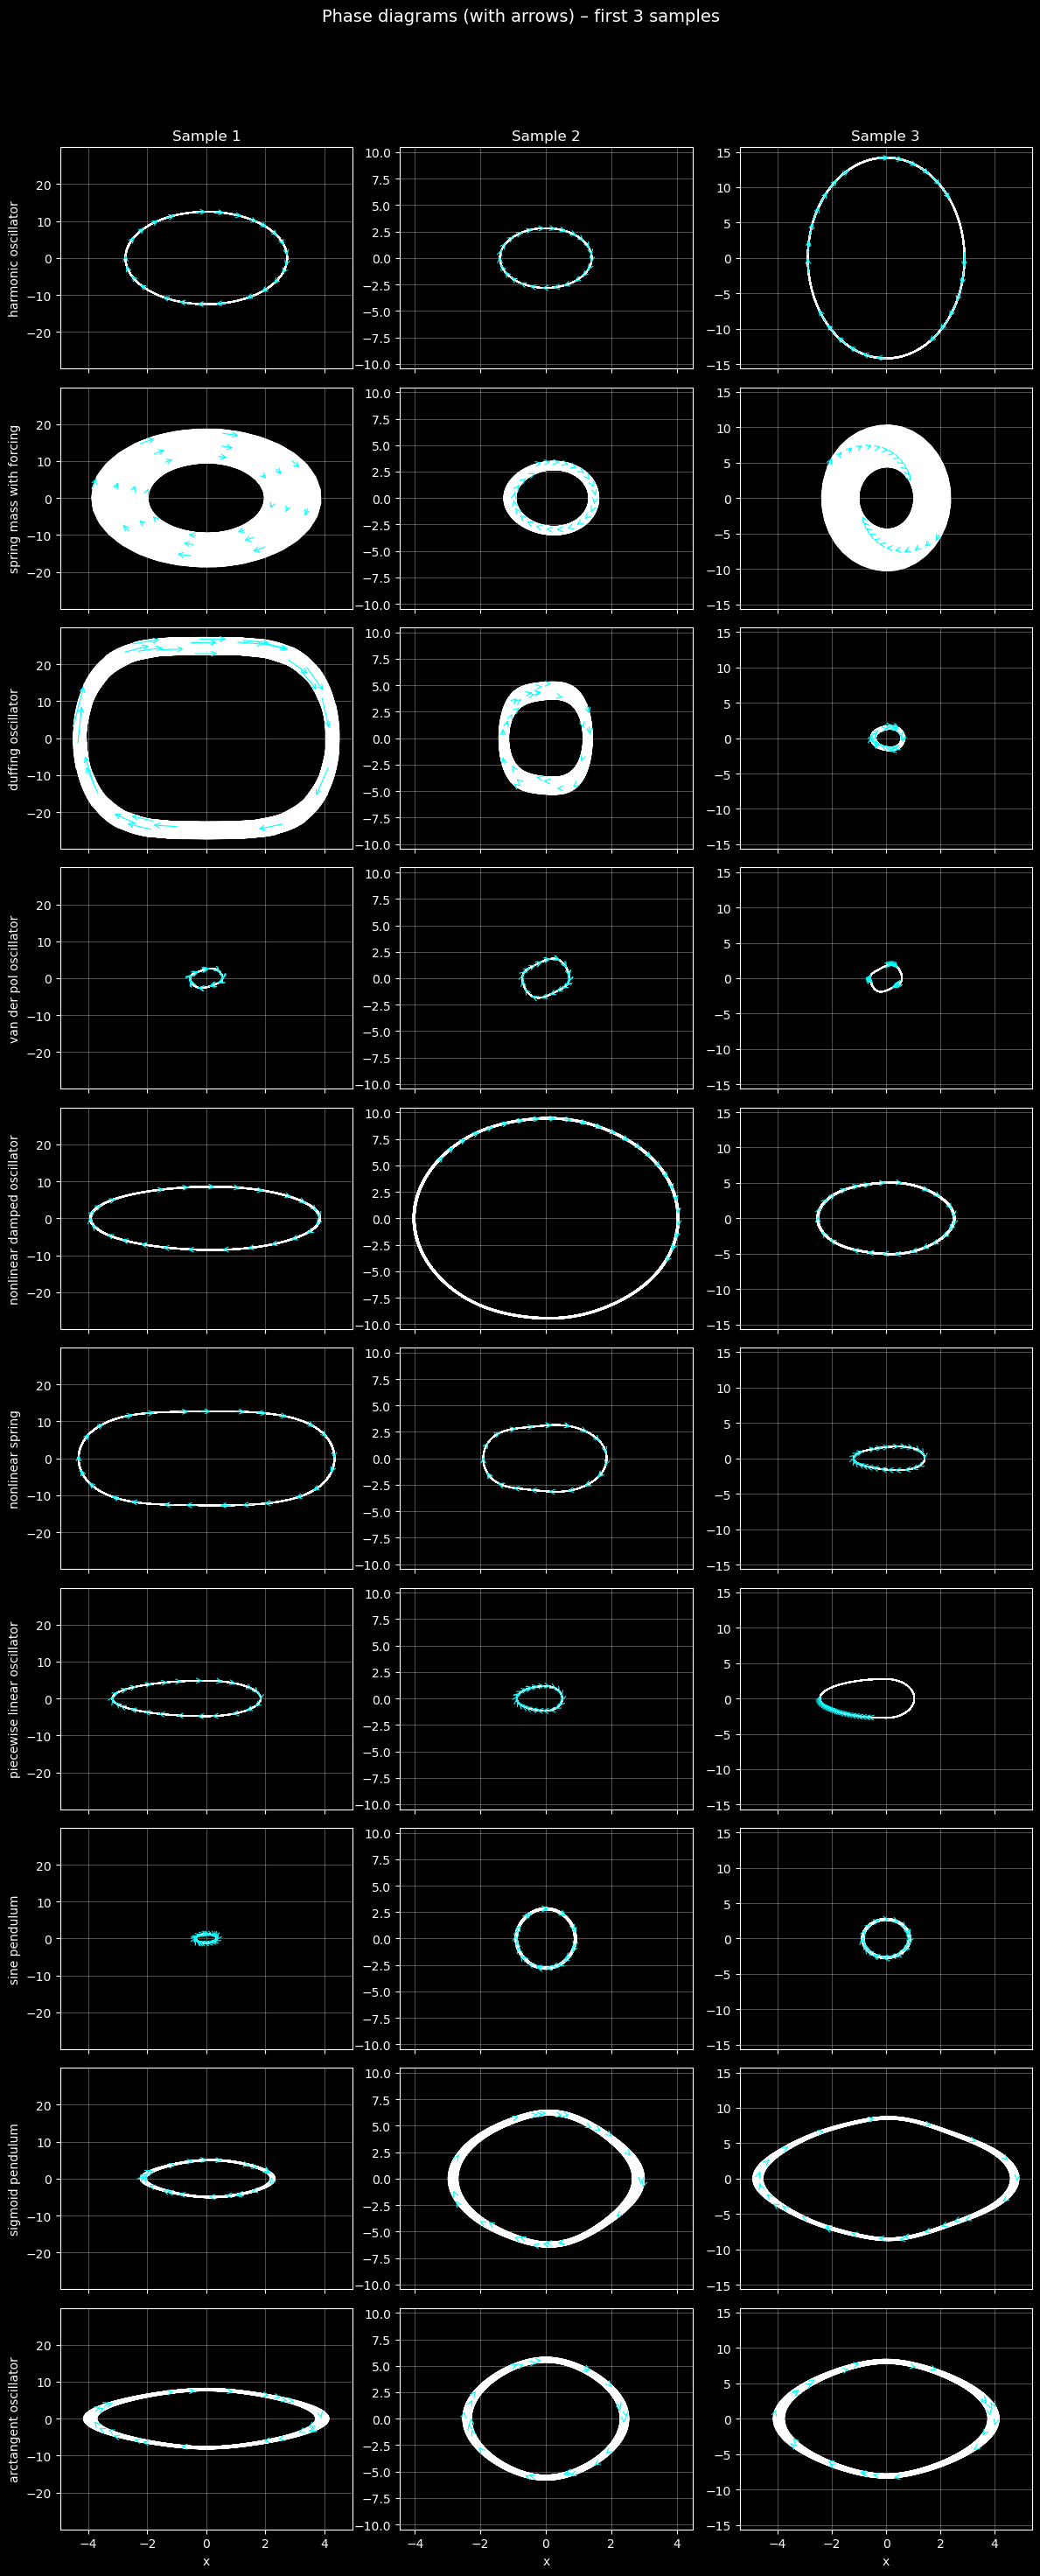

In [52]:
n_examples = 3
skip       = 200
plot_phase_diagrams(dataset=dataset, n_examples=n_examples, skip=skip)